<a href="https://colab.research.google.com/github/Broklink/Data-test/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Gathering

In [2]:
# Connect to GoogleDrive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read a file from GoogleDrive.
file_path = '/content/drive/MyDrive/Colab Notebooks/vgsales.csv'
df = pd.read_csv(file_path)

In [4]:
# Display the first 5 rows to get a quick look at the data structure.
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Check total length of dataset.
len(df)

16598

In [6]:
# Check for data type in each column.
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [21]:
# Define target and features.
label = 'Global_Sales'
num_features = ['Year']
cate_features = ['Platform', 'Genre', 'Publisher']
features = num_features + cate_features

## Data Preprocessing

### Universal Data Cleaning

#### Duplicate Data

In [24]:
df_clean = (
    df.groupby(['Name', 'Platform'], as_index=False)
      .agg({
          'Year': 'first',
          'Genre': 'first',
          'Publisher': 'first',
          'NA_Sales': 'sum',
          'EU_Sales': 'sum',
          'JP_Sales': 'sum',
          'Other_Sales': 'sum',
          'Global_Sales': 'sum'
      })
)

In [33]:
# Check duplicate rows.
df[df.duplicated(keep=False)]

# ดูว่ามีเกมชื่อซ้ำมั้ย
df[df.duplicated(subset=['Name'], keep=False)]

# ดูว่ามี (Name, Platform) ซ้ำมั้ย
df[df.duplicated(subset=['Name', 'Platform'], keep=False)]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1715,1717,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66,1.18
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
11676,11678,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [34]:
df_clean = (
    df.groupby(['Name', 'Platform'], as_index=False)
      .agg({
          'Year': 'first',
          'Genre': 'first',
          'Publisher': 'first',
          'NA_Sales': 'sum',
          'EU_Sales': 'sum',
          'JP_Sales': 'sum',
          'Other_Sales': 'sum',
          'Global_Sales': 'sum'
      })
)

print("ก่อน clean:", len(df))
print("หลัง clean:", len(df_clean))
print("หายไป:", len(df) - len(df_clean))


ก่อน clean: 16598
หลัง clean: 16593
หายไป: 5


In [35]:
df.loc[[1173, 1530], :]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29


In [37]:
df_clean[(df_clean['Name'] == 'Need for Speed: Most Wanted') &
         (df_clean['Platform'] == 'X360')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9627,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,1.62,0.97,0.03,0.25,2.87


#### Missing Data

In [38]:
# Check for missing values in each column.
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [39]:
# Remove missing target.
# ลบเฉพาะแถวที่ Year หรือ Publisher เป็น NaN
df_clean = df.dropna(subset=["Year", "Publisher"])

print(len(df_clean))   # ดูจำนวนแถวหลังลบ

16291


#### Distribution

In [40]:
# Check continuous features values.
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


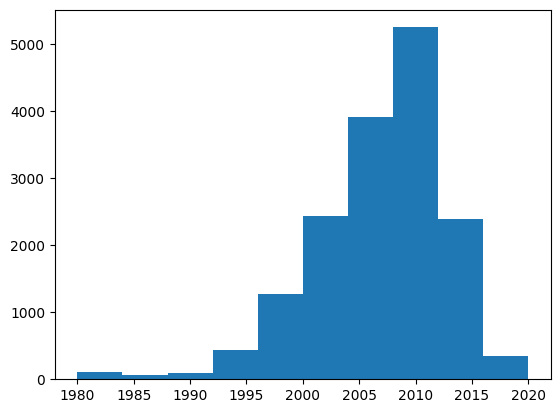

In [42]:
# Check age distribution.
plt.hist(df['Year'])
plt.show()

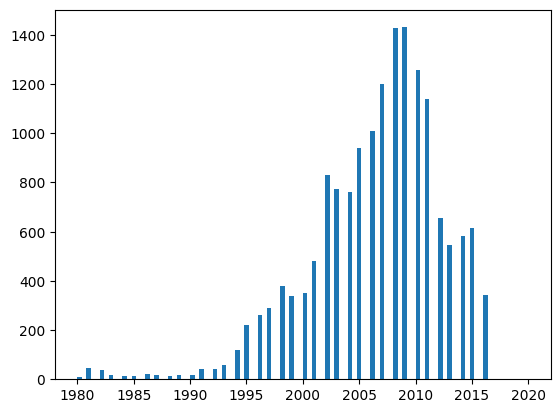

In [48]:
# Check age distribution in more detail.
plt.hist(df['Year'], bins=100)
plt.show()

In [49]:
# Check categorical features values.
for col in cate_features:
  print(df[col].value_counts())
  print('\n')

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New W

### Data Exploration

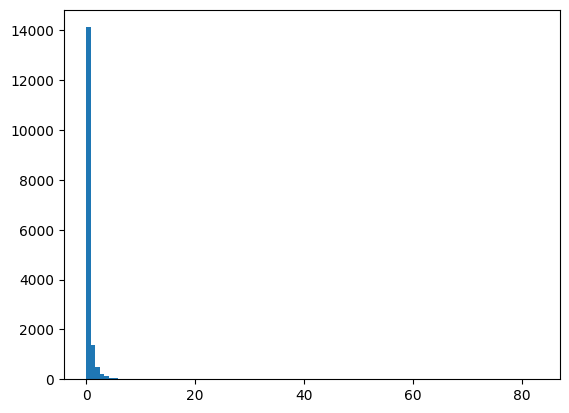

In [52]:
# Check label distribution.
plt.hist(df[label] ,bins=100)
plt.show()

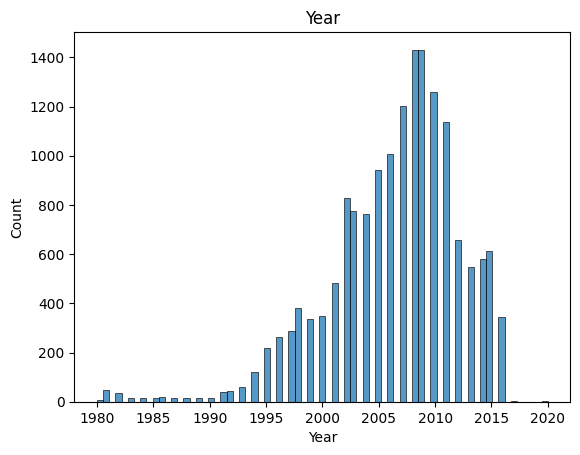

In [53]:
# Check continuous features distribution.
for col in num_features:
  plt.figure()
  sns.histplot(df[col])
  plt.title(col)
  plt.show()

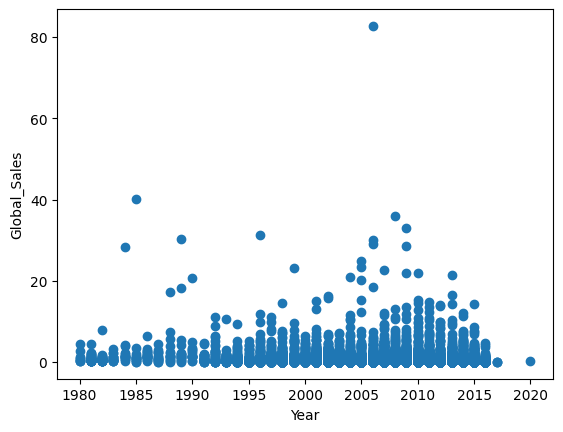

In [54]:
# Check continuous features relationship.
for col in num_features:
  plt.figure()
  plt.scatter(df[col], df[label])
  plt.xlabel(col)
  plt.ylabel(label)
  plt.show()

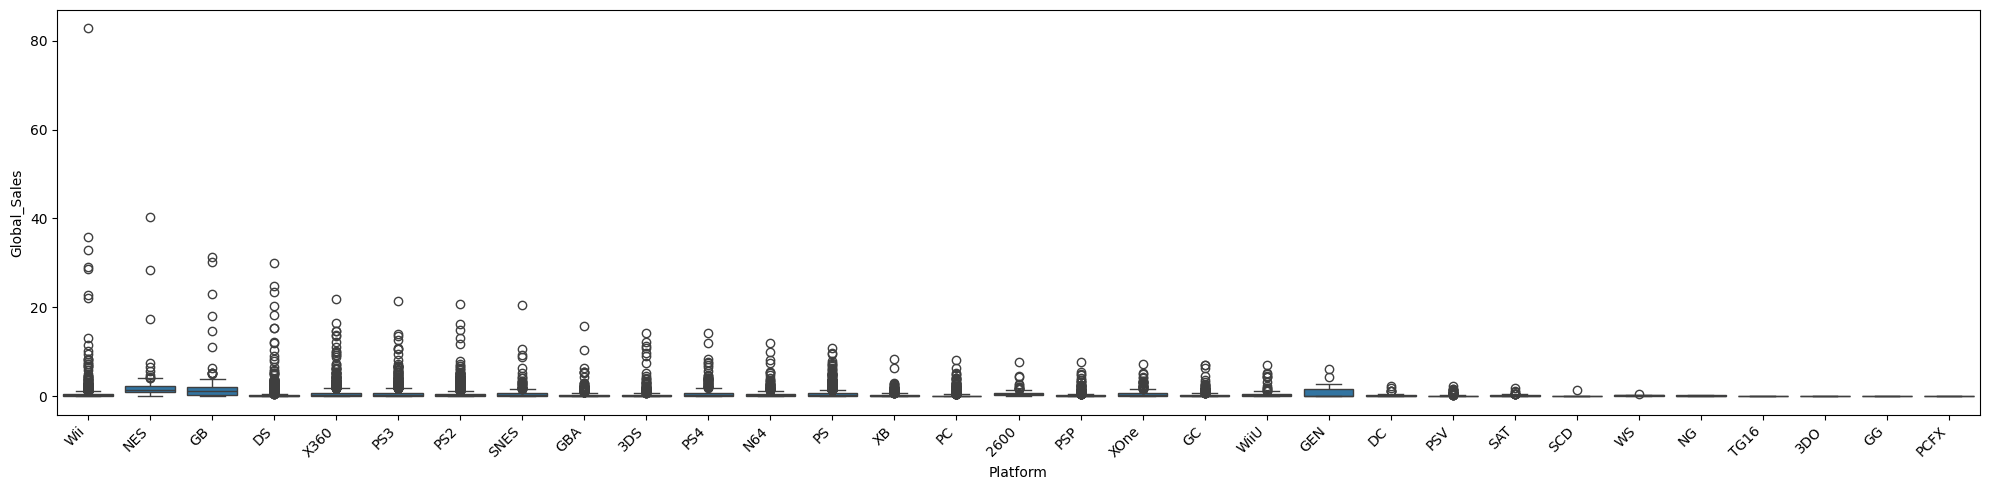

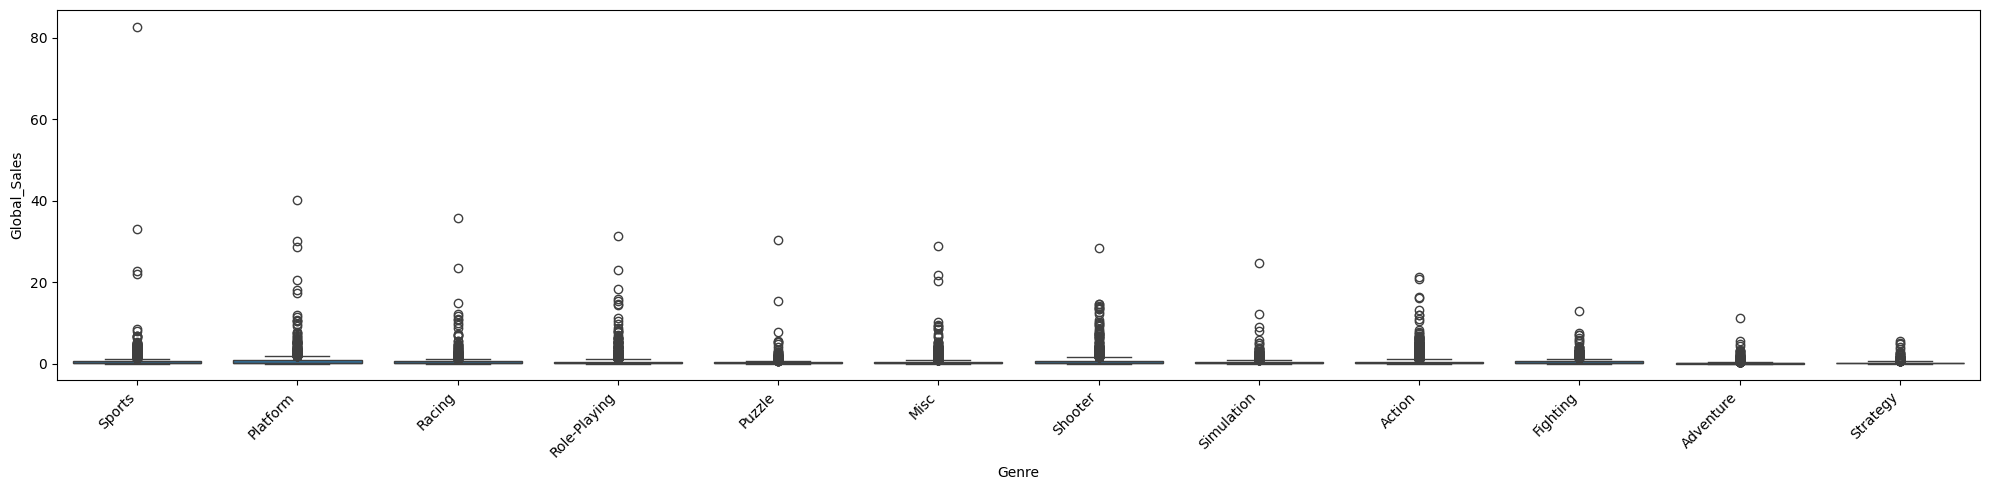

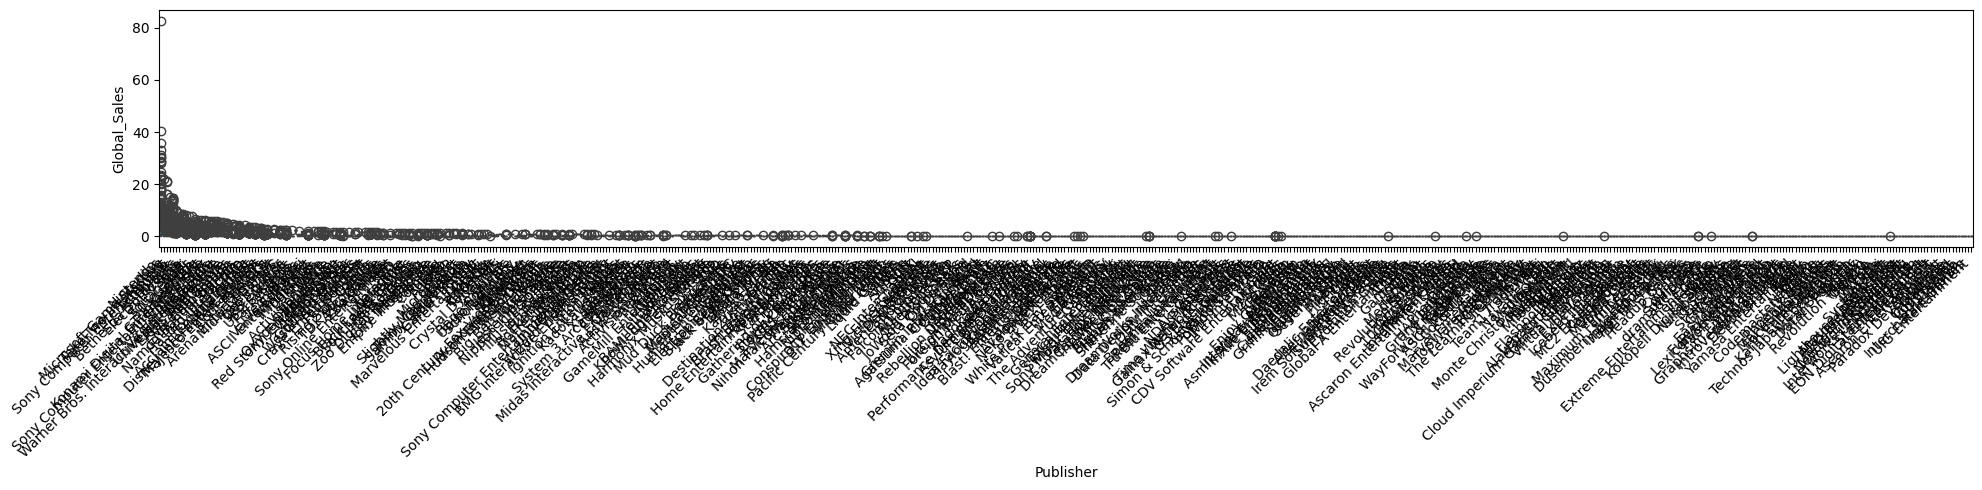

In [59]:
# Check categorical features relationship.
for col in cate_features:
    plt.figure(figsize=(20,5))       # เพิ่มขนาดรูปหน่อย
    sns.boxplot(x=col, y=label, data=df)
    plt.xlabel(col)
    plt.ylabel(label)
    plt.xticks(rotation=45, ha='right')  # 👈 หมุน 45° และชิดขวา
    plt.tight_layout()                  # ปรับ spacing ให้พอดี
    plt.show()

### Data Splitting

In [60]:
# Defind X and y
X = df[features]
y = df[label]

In [61]:
# Spit training set test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Data Cleansing

Missing Data

In [63]:
# Crate continuous features imputer.
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train[num_features])

SimpleImputer(strategy='median')

In [64]:
# Impute continuous features.
X_train[num_features] = num_imputer.transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

In [65]:
# Create categorical features imputer.
cate_imputer = SimpleImputer(strategy='most_frequent')
cate_imputer.fit(X_train[cate_features])

SimpleImputer(strategy='most_frequent')

In [66]:
# Impute categorical features.
X_train[cate_features] = cate_imputer.transform(X_train[cate_features])
X_test[cate_features] = cate_imputer.transform(X_test[cate_features])

In [67]:
# Check for missing values in each column in training set.
X_train.isnull().sum()

,0
Year,0
Platform,0
Genre,0
Publisher,0


In [68]:
# Check for missing values in each column in test set.
X_test.isnull().sum()

,0
Year,0
Platform,0
Genre,0
Publisher,0


Encoding

In [69]:
# Encoding categorical features.
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test)

In [70]:
X_train

,Year,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,2002.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2009.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2002.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1996.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2005.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,2009.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11614,2008.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11615,2011.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11616,2002.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# Align test set columns with training set columns.
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Scaling

In [72]:
# Create continuous features scaler.
scaler = StandardScaler()
scaler.fit(X_train[num_features])

StandardScaler()

In [73]:
# Scale continuous features.
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [74]:
X_train

,Year,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,-0.759617,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.444794,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.759617,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.791970,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.243441,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,0.444794,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11614,0.272735,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11615,0.788911,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11616,-0.759617,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
# Transform boolean into number.
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [76]:
X_train

,Year,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,-0.759617,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.444794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.759617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.791970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.243441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,0.444794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11614,0.272735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11615,0.788911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11616,-0.759617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

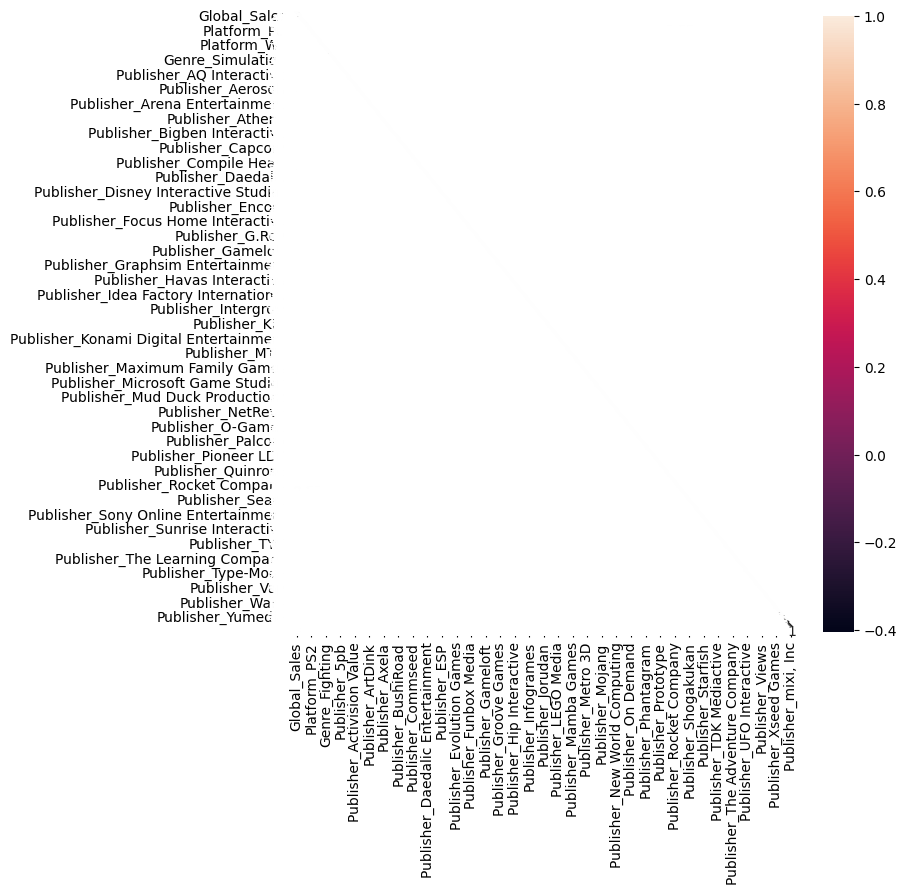

In [80]:
# Explore correlation.
plt.figure(figsize=(8, 8))
train_df = pd.concat([y_train, X_train], axis=1)
sns.heatmap(train_df.corr(), annot=True)
plt.show()

## Model Training

In [81]:
# Add constant.
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [82]:
X_train

,const,Year,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1.0,-0.759617,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.444794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.759617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-1.791970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-0.243441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,1.0,0.444794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11614,1.0,0.272735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11615,1.0,0.788911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11616,1.0,-0.759617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Create model.
model = sm.OLS(y_train, X_train).fit()

In [84]:
# Get model explanation.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.976
Date:                Thu, 18 Sep 2025   Prob (F-statistic):          4.48e-169
Time:                        15:11:13   Log-Likelihood:                -19701.
No. Observations:               11618   AIC:                         4.049e+04
Df Residuals:                   11072   BIC:                         4.451e+04
Df Model:                         545                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.0193      0.810     -0.024      0.981      -1.608       1.569
Year                                                -0.2049      0.034     -6.051      0.000      -0.271      -0.139
Platform_3DS                                         0.3382      0.247      1.369      0.171      -0.146       0.822
Platform_DC                                         -0.0572      0.315     -0.182      0.856      -0.675       0.561
Platform_DS                                          0.2778      0.223      1.247      0.212      -0.159       0.714
Platform_GB                                          1.4802      0.267      5.553      0.000       0.958       2.003
Platform_GBA                                        -0.0616      0.214     -0.288      0.773      -0.481       0.358
Platform_GC                                         -0.1588      0.218     -0.729      0.466      -0.586       0.268
Platform_GEN                                         0.3322      0.390      0.852      0.394      -0.432       1.096
Platform_GG                                         -0.8496      1.366     -0.622      0.534      -3.528       1.829
Platform_N64                                        -0.1499      0.220     -0.682      0.495      -0.581       0.281
Platform_NES                                         1.1812      0.248      4.760      0.000       0.695       1.668
Platform_NG                                         -0.1818      0.654     -0.278      0.781      -1.464       1.100
Platform_PC                                          0.0893      0.229      0.390      0.697      -0.360       0.538
Platform_PCFX                                       -0.5441      1.758     -0.309      0.757      -3.991       2.902
Platform_PS                                          0.2606      0.203      1.286      0.199      -0.137       0.658
Platform_PS2                                         0.3912      0.213      1.839      0.066      -0.026       0.808
Platform_PS3                                         0.6798      0.233      2.923      0.003       0.224       1.136
Platform_PS4                                         0.9151      0.259      3.538      0.000       0.408       1.422
Platform_PSP                                         0.2599      0.226      1.149      0.251      -0.183       0.703
Platform_PSV                                         0.4107      0.253      1.622      0.105      -0.086       0.907
Platform_SAT                                        -0.2090      0.234     -0.895      0.371      -0.667       0.249
Platform_SCD                                        -0.4656      0.637     -0.731      0.465      -1.714       0.783
Platform_SNES                            

## Model Evaluation

Evaluate training set

In [85]:
# Predict training set.
y_pred = model.predict(X_train)

In [86]:
# Calculate metrics.
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

In [87]:
# Print results.
print(f"Mean: {y_train.mean():.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean: 0.53
R-squared (R²): 0.16
Mean Absolute Error (MAE): 0.51
Root Mean Squared Error (RMSE): 1.32


Evaluate test set

In [88]:
# Predict test set.
y_pred = model.predict(X_test)

In [89]:
# Calculate metrics.
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [90]:
# Print results.
print(f"Mean: {y_test.mean():.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean: 0.55
R-squared (R²): 0.09
Mean Absolute Error (MAE): 0.55
Root Mean Squared Error (RMSE): 1.71
